# TP Final - Seminario MIR

## Nombre: Eugenio Massolo
## DNI:40098118
## Legajo: 38663

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import scipy.signal as sps
import librosa.display
import IPython.display as ipd
plt.style.use('dark_background')

## Chirp

#### Se genera un barrido frecuencial como señal de prueba.

In [2]:
# Frecuencia inicial
f0 =20
# Frecuencia final
f1 =20000
# Duración [segundos]
D = 10
# Frecuencia de muestreo
fs = 44100

t = np.linspace(0, D, fs*D)
chirp_sweep = sps.chirp(t, f0, D, f1, 'logarithmic')  # importada de `scipy`
# Argumentos = [vector de muestas (t), frecuencia al tiempo inicial, tiempo en
# el que se especifica la f1, f1, tipo de barrido]

## Comparación de espectrogramas

#### Se grafica el espectrograma del barrido senoidal de dos formas distintas para evaluar diferencias.

## Specshow (Librosa)

#### En el primer caso se calcula la STFT de la señal mediante una función de la librería Librosa. Se implementa un largo de FFT de 1024 muestras, de igual longitud que la ventana, y un solapamiento del 50%, es decir 512 muestas. La ventana implementada por defecto es la ventana Hanning. Al resultado se lo lleva a una escala en decibeles y se lo grafica a partir de la función display.specshow de Librosa. 

## Specgram (Matplotlib)

#### En este caso, la función specgram de Matplotlib realiza tanto el cálculo de la stft como el gráfico del mismo. Los parámetros de entrada son los mísmos detallados en el caso anterior, pero acá tambien resulta necesario definir el gráfico en modo "magnitud" y definir una escala de tipo "dB", de esta forma se llega al mismo resultado que el método anterior a partir de otra librería distinta.

Text(0, 0.5, 'Frecuencia [Hz]')

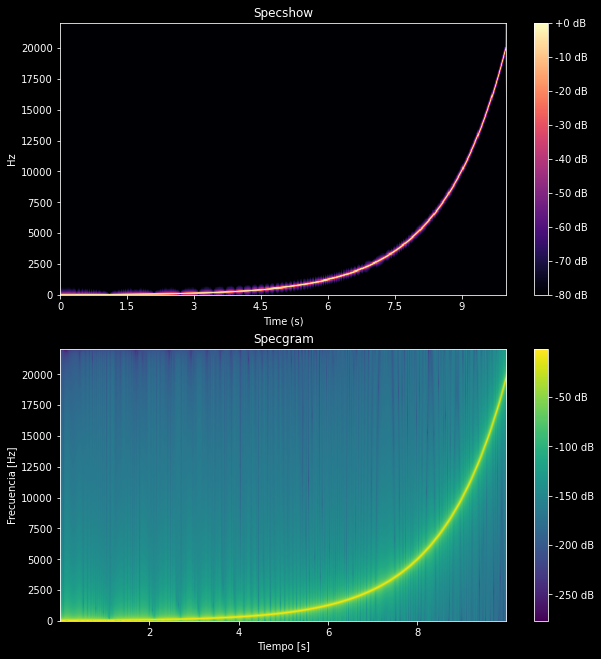

In [3]:
""" librosa.stft + librosa.specshow """

magspec = lb.amplitude_to_db(lb.stft(chirp_sweep, n_fft= 1024, hop_length=512), ref=np.max)

plt.figure(figsize=(10,11))
plt.subplot(2, 1, 1)
lb.display.specshow(magspec, sr=fs, x_axis='s', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Specshow')

""" matplotlib.pyplot.specgram """

plt.subplot(2, 1, 2)
plt.specgram(chirp_sweep, scale='dB', Fs=fs, NFFT=1024, mode='magnitude')
plt.colorbar(format='%+2.0f dB')
plt.title('Specgram')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')

#### Se puede ver que en la configuración predeterminada de cada uno de los espectrogramas, el rango dinámico representado difiere bastante. La función Specgram mantiene un rango dinámico mucho mayor (0 a -280 dB aproximadamente) contra los 80 dB de la función Specshow, la cual permite ver las variaciónes de nivel mas sutiles con mayor detalle. De todas formas, esto debe poder ser configurado y no define la calidad de las funciones utilizadas.

## Análisis de señales de audio


#### Se procede a analizar el espectro de una señal de audio correspondiente a una señal de voz humana.

#### Los audios se leen mediante la librería Librosa. Se cargan audios correspondientes al habla de un hombre y al canto de una mujer.

## Voz de hombre

In [4]:
male ,fs1 = lb.load('male_voice.wav',sr = None) #Se mantiene la frecuencia de muestreo original
ipd.Audio(male, rate=fs1)

#### Para el análisis de la señal se utiliza la primera de las dos alternativas planteadas anteriormente, siendo esta la función Specshow de Librosa. Se grafica la forma de onda de la señal en paralelo al espectrograma para una mejor interpretación de los datos.

Text(0.5, 1.0, 'Specshow')

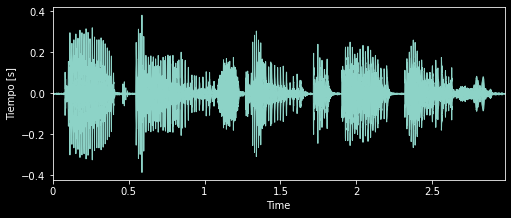

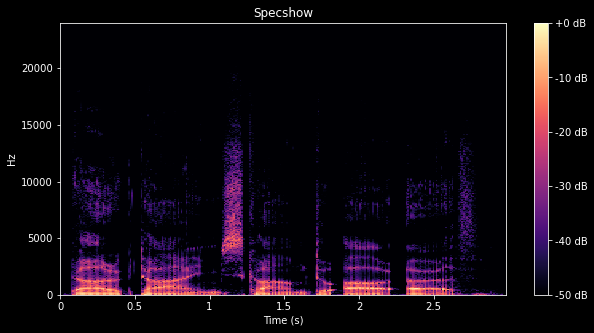

In [5]:
""" librosa.stft + librosa.specshow """

magspec = lb.amplitude_to_db(lb.stft(male, n_fft= 1024, hop_length=512), ref=np.max)

plt.figure(figsize=(8.1,7))
plt.figure(1)
plt.subplot(2, 1, 1)
librosa.display.waveplot(male, sr=fs1)
plt.ylabel('Tiempo [s]')
plt.figure(figsize=(10,11))
plt.subplot(2, 1, 2)
lb.display.specshow(magspec, sr=fs1, x_axis='s', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.clim(-50, 0)
plt.title('Specshow')


### Dado que se trata de la voz humana (particularmente de un hombre), la energía radica especialmente en la parte inferior del espectrograma, por lo que se decide probar con un plotéo logarítmico del eje frecuencial para entender mejor lo que sucede en esa porción del espectro.

Text(0.5, 1.0, 'Specshow')

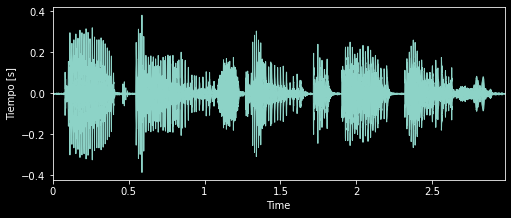

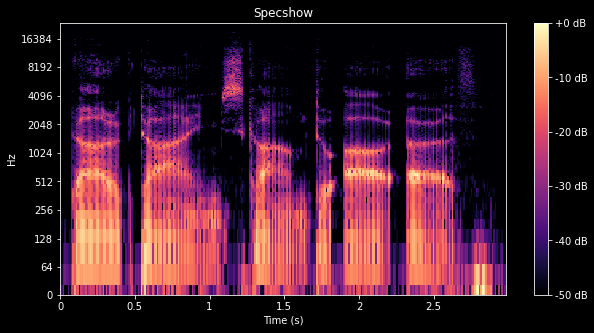

In [6]:
plt.figure(figsize=(8.1,7))
plt.figure(1)
plt.subplot(2, 1, 1)
librosa.display.waveplot(male, sr=fs1)
plt.ylabel('Tiempo [s]')
plt.figure(figsize=(10,11))
plt.subplot(2, 1, 2)
lb.display.specshow(magspec, sr=fs1, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.clim(-50, 0)
plt.title('Specshow')

#### Como se ve, en este grafico es posible apreciar con mayor detalle en que frecuencias radica la energía, pero a su vez se pierde resolución en bajas frecuencias. Esto podría ser solucionado con un ventaneo de ancho variable o simplemente aumentando la cantidad de muestras de la FFT.

## Canto femenino

#### Se realiza el mismo análisis para el caso del audio correspondiente al canto de una mujer. El eje frecuencial se define directamente de forma logarítmica.

In [7]:
female ,fs2 = lb.load('female_sing.wav',sr = None)
ipd.Audio(female, rate=fs2)

Text(0.5, 1.0, 'Specshow')

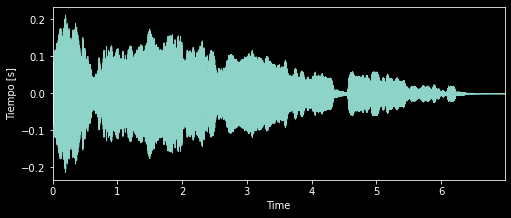

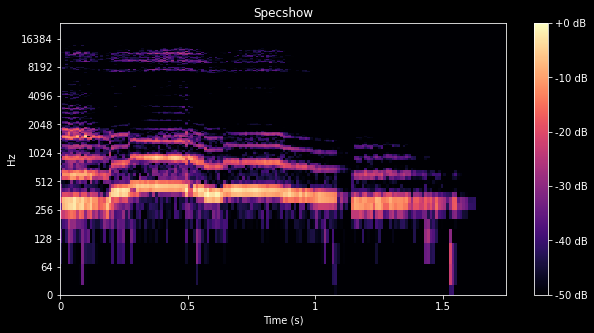

In [10]:
""" librosa.stft + librosa.specshow """

magspec = lb.amplitude_to_db(lb.stft(female, n_fft= 1024, hop_length=2048), ref=np.max)

plt.figure(figsize=(8.1,7))
plt.figure(1)
plt.subplot(2, 1, 1)
librosa.display.waveplot(female, sr=fs1)
plt.ylabel('Tiempo [s]')
plt.figure(figsize=(10,11))
plt.subplot(2, 1, 2)
lb.display.specshow(magspec, sr=fs1, x_axis='s', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.clim(-50, 0)
plt.title('Specshow')

#### En este caso se puede apreciar la característica tonal del canto de la mujer. El gráfico muestra que determinadas notas se mantienen por pequeños períodos de tiempo, lo cual se condice con el contenido melódico de la voz en una canción. En el siguiente gráfico se trata de generar un cromagrama con las notas correspondientes al canto de la mujer a lo largo del tiempo.

Text(0.5, 1.0, 'Chromagram')

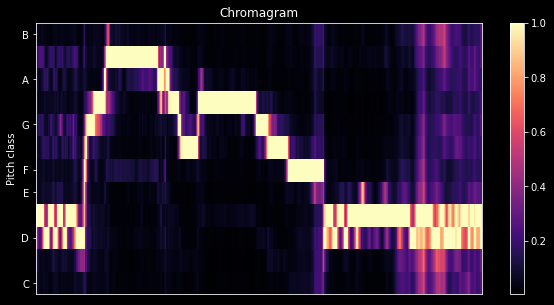

In [9]:
C = librosa.feature.chroma_cqt(y=female, sr=fs2)
plt.figure(figsize=(10,5))
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')